In [80]:
# Import required libraries
import oracledb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

In [41]:
# === Database connection ===
username = "SYS"
password = "senait.01"  # Replace with your actual password
dsn = oracledb.makedsn("localhost", 1521, service_name="xepdb1")

# Corrected connection line
connection = oracledb.connect(user=username, password=password, dsn=dsn, mode=oracledb.SYSDBA)
cursor = connection.cursor()

In [44]:
# === Query data from reviews table ===
query = """
    SELECT bank_id, date_posted, sentiment_score, rating, themes
    FROM reviews
    ORDER BY date_posted
"""
df = pd.read_sql(query, connection)

C:\Users\Senayit\AppData\Local\Temp\ipykernel_5728\3290355458.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [31]:
# === Close connection ===
cursor.close()
connection.close()

In [32]:
print(df.columns)

Index(['BANK_ID', 'DATE_POSTED', 'SENTIMENT_SCORE', 'RATING', 'THEMES'], dtype='object')


In [13]:
# === Data preprocessing ===
# Convert date_posted to datetime and extract month-year for trends
df['DATE_POSTED'] = pd.to_datetime(df['DATE_POSTED'])
df['month_year'] = df['DATE_POSTED'].dt.to_period('M').astype(str)

In [16]:
# Group by bank and month for sentiment trends
sentiment_trends = df.groupby(['BANK_ID', 'month_year'])['SENTIMENT_SCORE'].mean().reset_index()

In [76]:
# Extract keywords from themes (split and count) after data is loaded
df['keywords'] = df['THEMES'].str.split(',').explode().str.strip()
keyword_counts = df['keywords'].value_counts().head(10)
print("Top 10 keywords in themes:", keyword_counts)

Top 10 keywords in themes: Series([], Name: count, dtype: int64)


In [60]:
# === Visualization ===
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

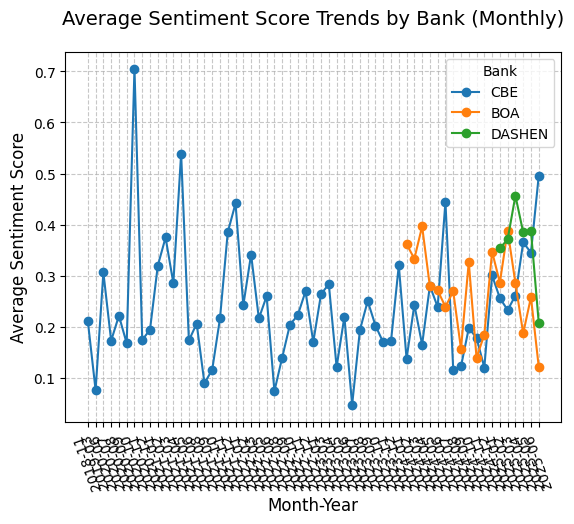

In [71]:
# Plot 1: Sentiment Trends (Line Chart)
plt.subplot(1, 1, 1)
for bank in df['BANK_ID'].unique():
    bank_data = sentiment_trends[sentiment_trends['BANK_ID'] == bank]
    plt.plot(bank_data['month_year'], bank_data['SENTIMENT_SCORE'], marker='o', label=bank)
plt.title('Average Sentiment Score Trends by Bank (Monthly)', fontsize=14, pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=110)
plt.legend(title='Bank')
plt.grid(True, linestyle='--', alpha=0.7)

C:\Users\Senayit\AppData\Local\Temp\ipykernel_5728\3800882609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BANK_ID', y='SENTIMENT_SCORE', data=df, palette='Set2')


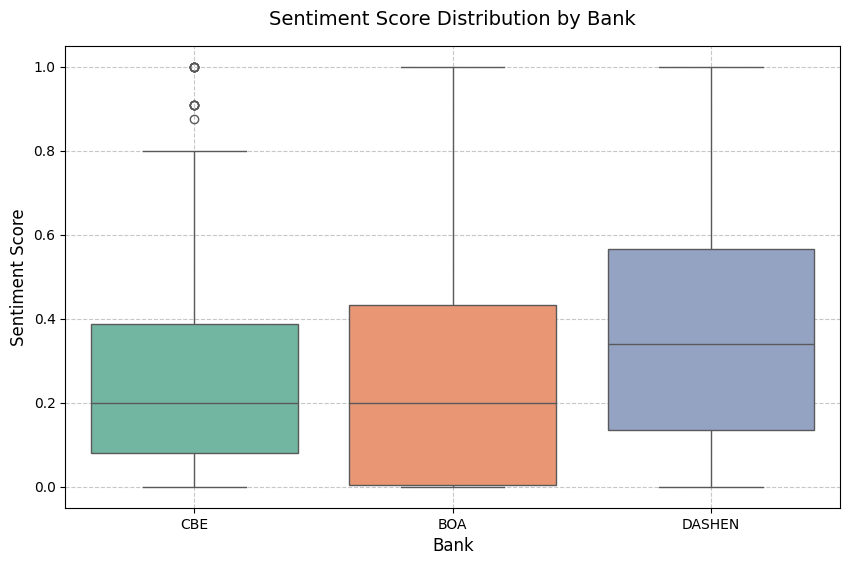

In [ ]:
# Sentiment Distribution Visualization 
plt.figure(figsize=(10, 6))
sns.boxplot(x='BANK_ID', y='SENTIMENT_SCORE', data=df, palette='Set2')
plt.title('Sentiment Score Distribution by Bank', fontsize=14, pad=15)
plt.xlabel('Bank', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

C:\Users\Senayit\AppData\Local\Temp\ipykernel_5728\3319214075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='BANK_ID', y='RATING', kind='bar', data=df, height=6, aspect=1.5, palette='viridis')


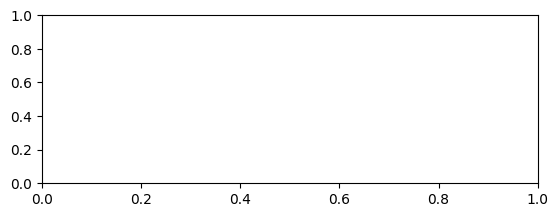

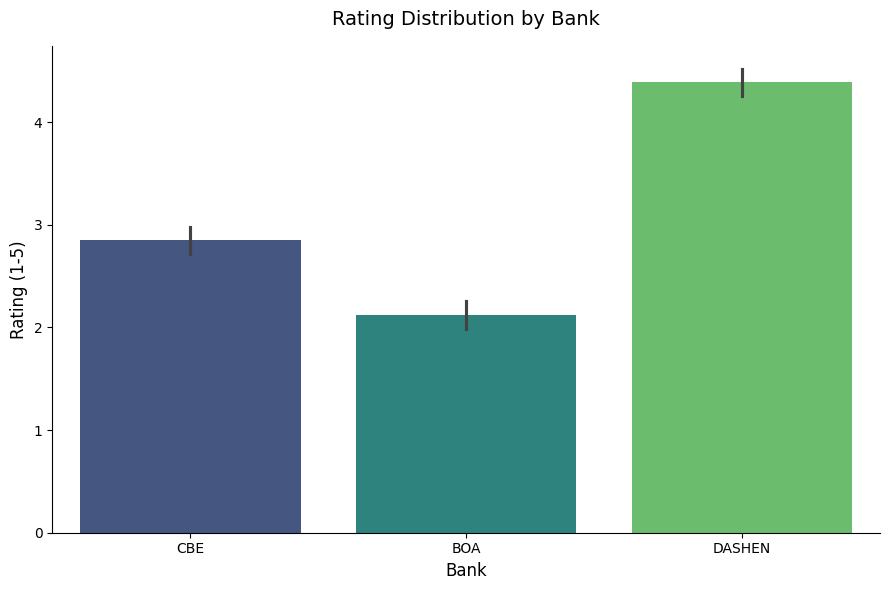

In [24]:
# Subplot 2: Rating Distribution (Bar Chart)
plt.subplot(2, 1, 2)
sns.catplot(x='BANK_ID', y='RATING', kind='bar', data=df, height=6, aspect=1.5, palette='viridis')
plt.title('Rating Distribution by Bank', fontsize=14, pad=15)
plt.xlabel('Bank', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.xticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure for the report
plt.savefig('sentiment_rating_visualization.png', dpi=200, bbox_inches='tight')
plt.show()
